<!-- PROJECT SHIELDS -->
<!--
*** I'm using markdown "reference style" links for readability.
*** Reference links are enclosed in brackets [ ] instead of parentheses ( ).
*** See the bottom of this document for the declaration of the reference variables
*** for contributors-url, forks-url, etc. This is an optional, concise syntax you may use.
*** https://www.markdownguide.org/basic-syntax/#reference-style-links
-->





<!-- PROJECT LOGO -->
<br />
<h3 align="center">Dave3625 - Lab4</h3>
<p align="center">
  <a href="https://github.com/DAVE3625/Dave3625-Host-2025/tree/main/Lab4">
    <img src="img/header.png" alt="Data wrangling" width="auto" height="auto">
  </a>

  

  <p align="center">
    Logistic Regression<br>
    <br />
    <a href="https://github.com/DAVE3625/Dave3625-Host-2025/issues">Report Bug</a>
    ·
    <a href="https://github.com/DAVE3625/Dave3625-Host-2025/issues">Request Feature</a>
  </p>
</p>
<!--  -->

<!-- ABOUT THE LAB -->

<details>
  <summary>Table of Contents</summary>

1. [About The Lab](#about-the-lab)
   - [Tools and Libraries](#tools-and-libraries)
   - [Instructions](#instructions)
2. [New Imports](#new-imports)
3. [Tasks](#tasks)
4. [Conclusion](#conclusion)
5. [Useful Links](#useful-links)
6. [License](#license)

</details>

## About The Lab

In this lab, you will gain hands-on experience with several key concepts and techniques in machine learning:

- **[Logistic Regression][whatis-logisticregression]**: Understand and implement logistic regression models for binary classification tasks.
- **[Correlation][whatis-correlation]**: Learn how to compute and interpret correlation matrices to understand relationships between features.
- **[Feature Selection][whatis-featureselection]**: Discover methods to select the most relevant features for your supervised learning models.
- **Model Evaluation**: Evaluate your models using performance metrics such as [ROC][whatis-roc] (Receiver Operating Characteristic) curves and [AUC][whatis-auc] (Area Under the Curve).

### Tools and Libraries

We will be using the following Python libraries:

- **[pandas]**: For data manipulation and analysis.
- **[numpy]**: For numerical computations.
- **[seaborn]**: For data visualization.
- **[sklearn]**: For machine learning algorithms and tools.

### Instructions

In this lab, you will work with the Titanic dataset to predict passenger survival using logistic regression. You will:

- Preprocess and split the data into training and testing sets.
- Engineer new features.
- Perform exploratory data analysis.
- Select important features using Recursive Feature Elimination (RFE).
- Build and evaluate a logistic regression model.
- Understand evaluation metrics such as confusion matrix, accuracy, log loss, and AUC.
- Perform cross-validation.

In [113]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Load the titanic dataset that we cleaned in the last lab, it's found under /data/Titanic_Cleaned.csv.

In [114]:
df = pd.read_csv('./data/Titanic_Cleaned.csv')

## Tasks
**Task 1: Split the Dataset**
We need to split the dataset into two parts:
- Training Set (df_train): Contains passengers with known 'Survived' values.
- Test Set (df_test): Contains passengers with missing 'Survived' values.

**Instructions:**

- Create the test set by selecting rows where 'Survived' is NaN.
- Create the training set by dropping rows where 'Survived' is NaN.
- Save both datasets as CSV files for future use.

In [115]:
df_train = df[df['Survived'].notnull()]
df_test = df[df['Survived'].isnull()]
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
# Check the shapes
print(f"Training set shape: {df_train.shape}")
print(f"Test set shape: {df_test.shape}")

Training set shape: (891, 15)
Test set shape: (418, 15)


In [116]:
# Save the test and train data as csv files so that it is easier to load them in the future
df_test.to_csv('data/test.csv', index=False)
df_train.to_csv('data/train.csv', index=False)

**Task 2: Create a New Feature 'TravelAlone'**

According to the kaggle data dictionary the columns **SibSp** and **Parch** are related to traveling with family. Create a new categorical variable: whether or not the individual was traveling alone.

**Instructions:**

1. Create the 'TravelAlone' feature:
   - Set to 1 if the passenger was traveling alone.
   - Set to 0 if the passenger was traveling with family.
2. Drop the 'SibSp' and 'Parch' columns, as they are no longer needed.

Code: 

```python
# using np.where()
df_train.loc[:, 'TravelAlone'] = np.where((df_train["SibSp"] + df_train["Parch"]) > 0, 0, 1) 

# or using boolean check
df_train['TravelAlone'] = (df_train['SibSp'] + df_train['Parch'] == 0).astype(int)
```

In [117]:
df_train.loc[:, 'TravelAlone'] = np.where((df_train["SibSp"] + df_train["Parch"]) > 0, 0, 1) 
df_train[['SibSp', 'Parch', 'TravelAlone']].head()

C:\Users\PerEr\AppData\Local\Temp\ipykernel_18308\1396835200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:, 'TravelAlone'] = np.where((df_train["SibSp"] + df_train["Parch"]) > 0, 0, 1)


,SibSp,Parch,TravelAlone
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [118]:
df = df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [119]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'HasCabin',
       'CatAge', 'CatFare', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Unique', 'TravelAlone'],
      dtype='object')

**Task 3: Explore the Data**
Let's explore the data to understand how different features affect survival.

**Instructions:**
1. Visualize the impact of age categories on survival using a density plot.
2. Analyze other features such as 'Fare', 'Pclass', 'Sex', and 'TravelAlone'.
3. Interpret the plots and write down your observations.


**Example for 'CatAge' column:**
```python
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["CatAge"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["CatAge"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age Category for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-1,4)
plt.show()
```

Repeat similar plots for other features like 'CatFare', 'Pclass', 'TravelAlone', etc...

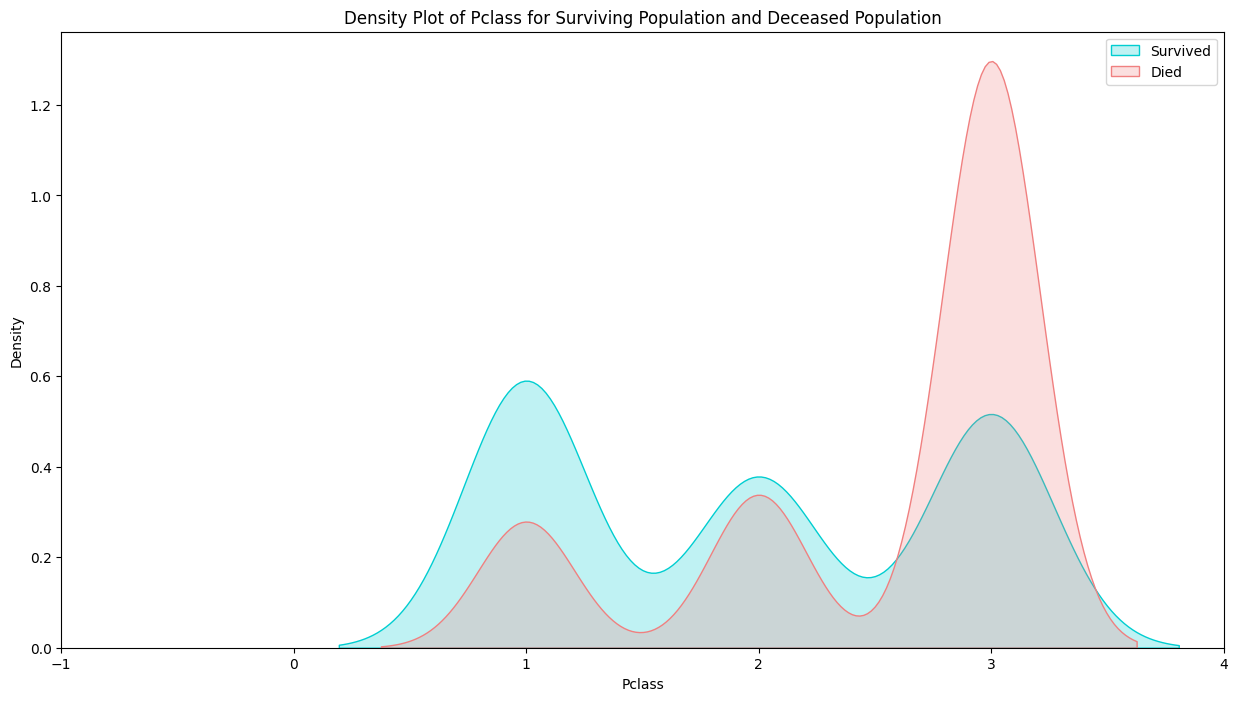

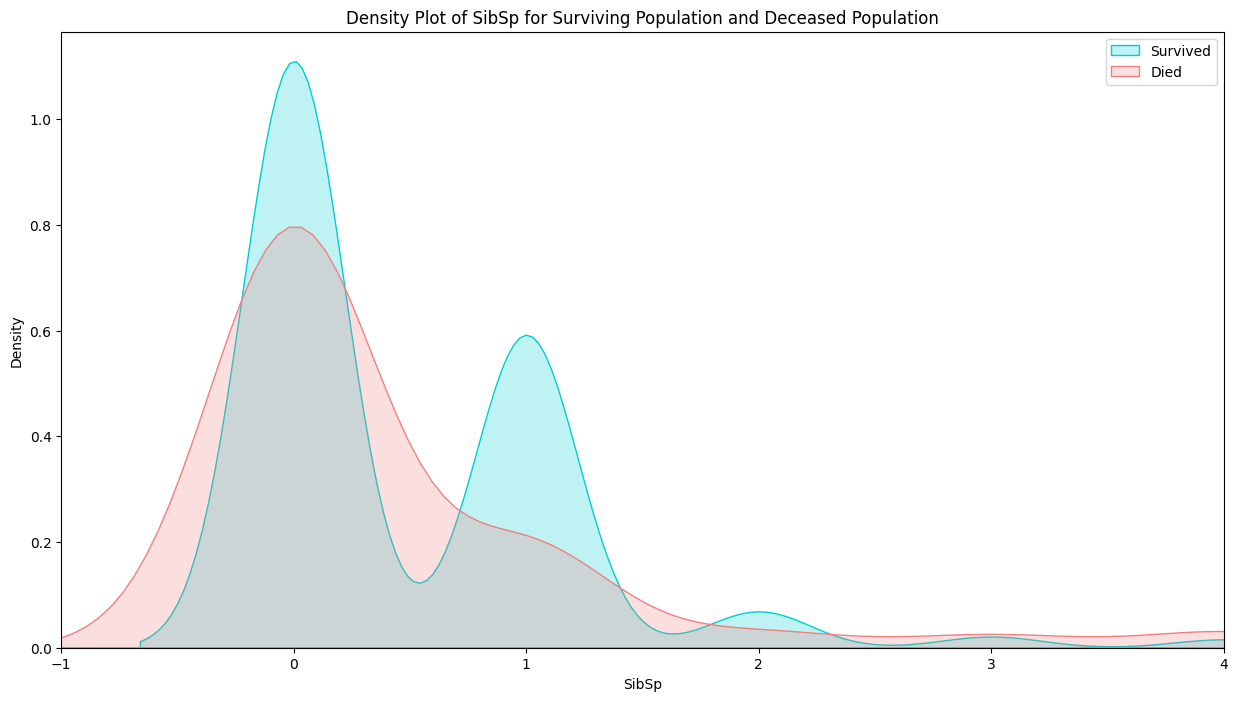

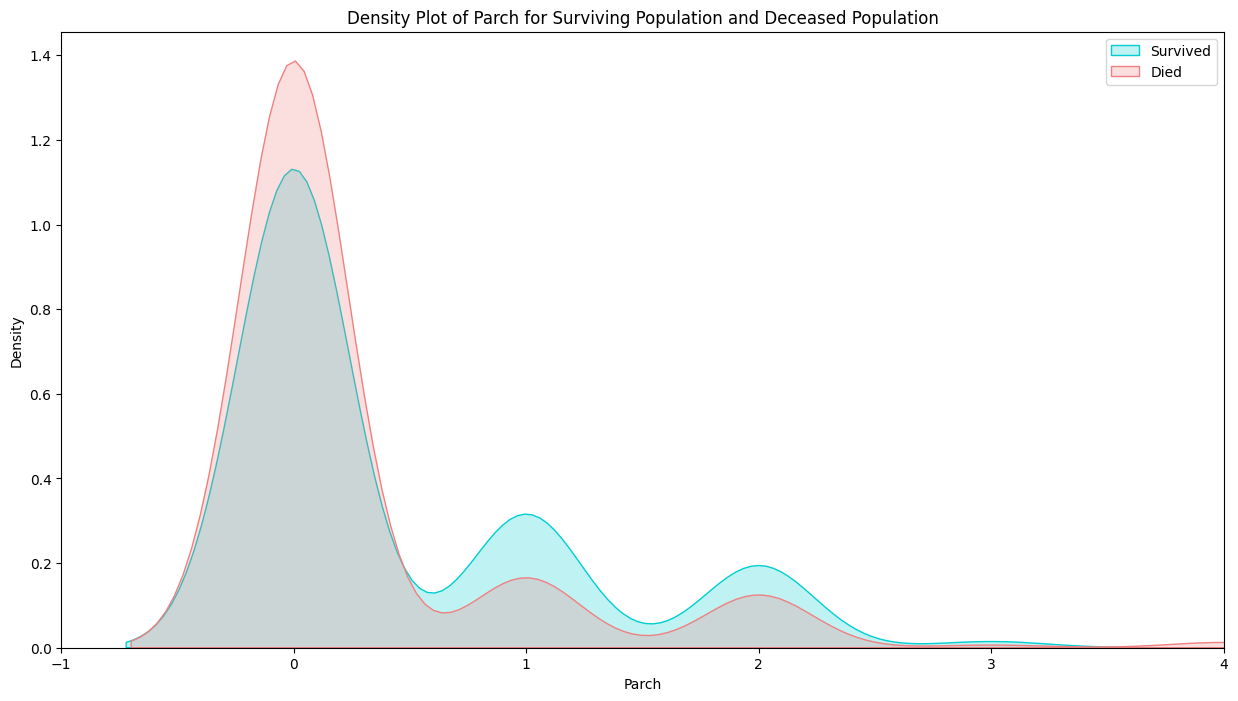

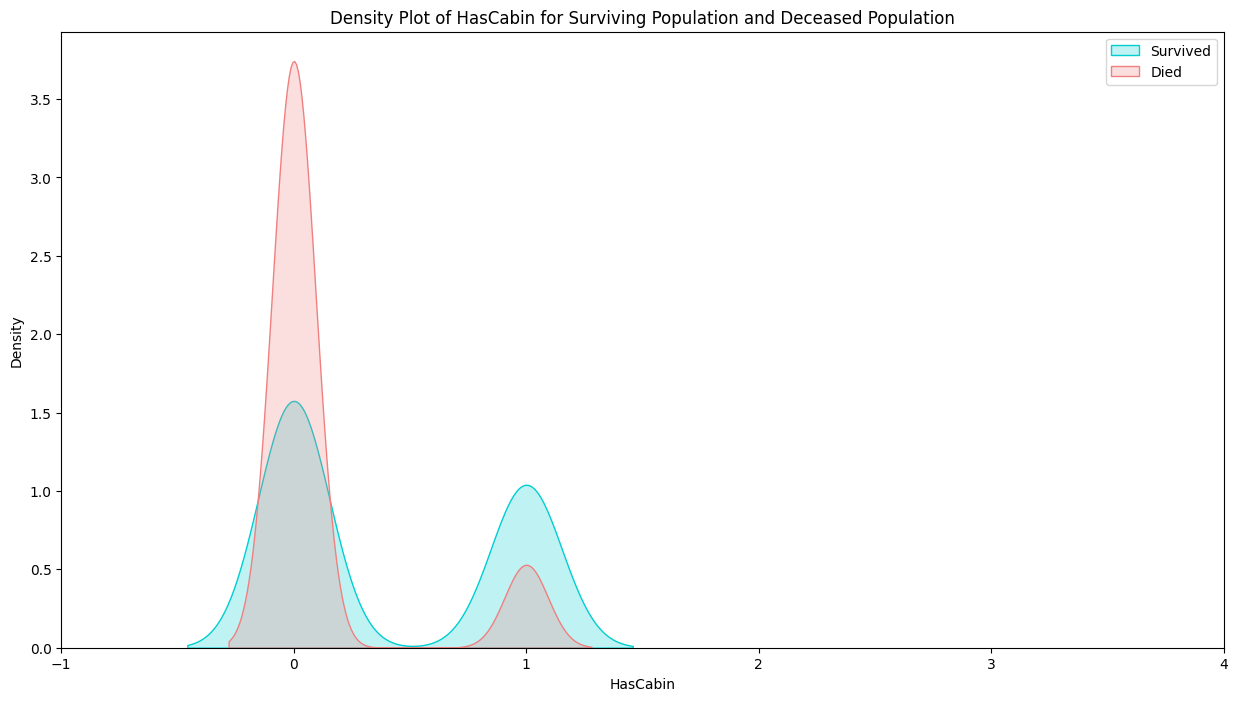

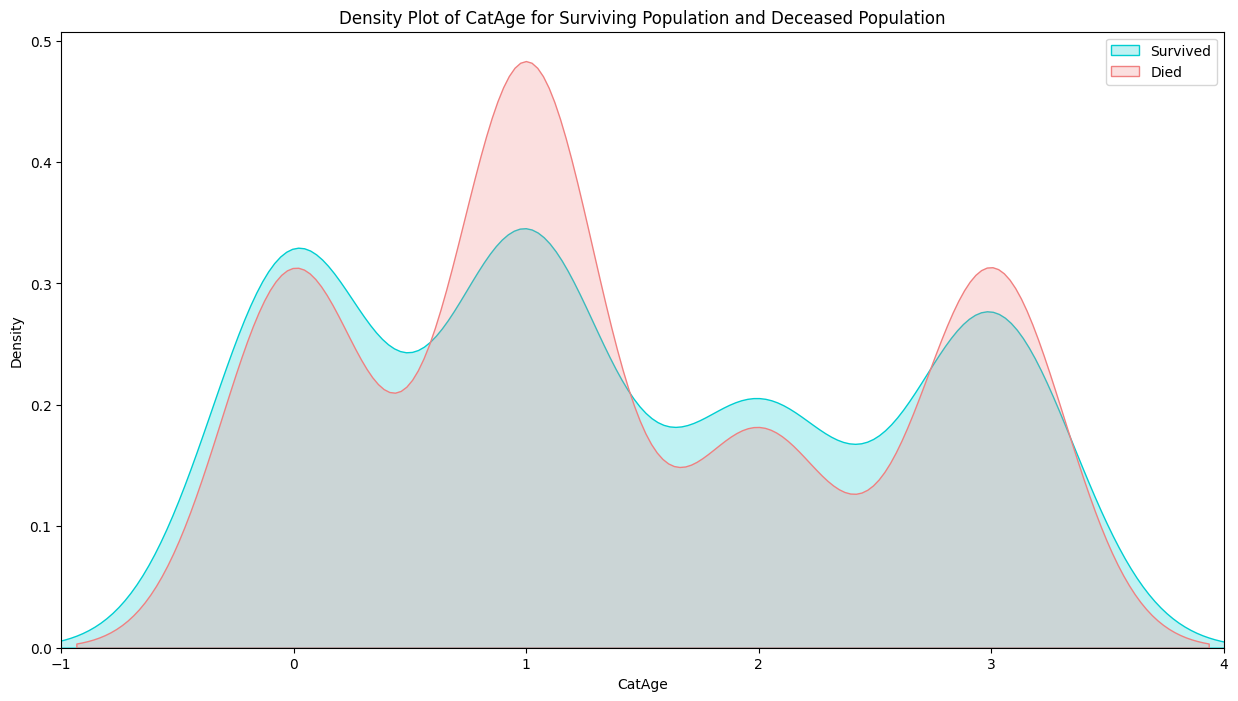

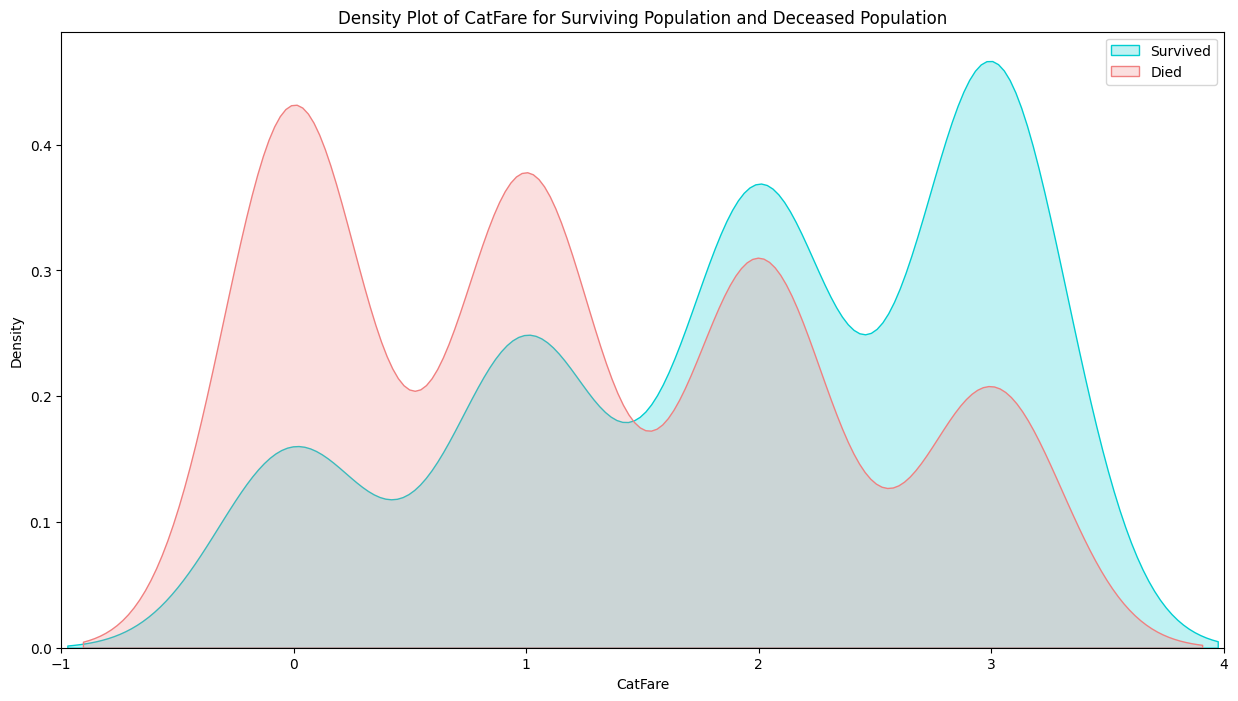

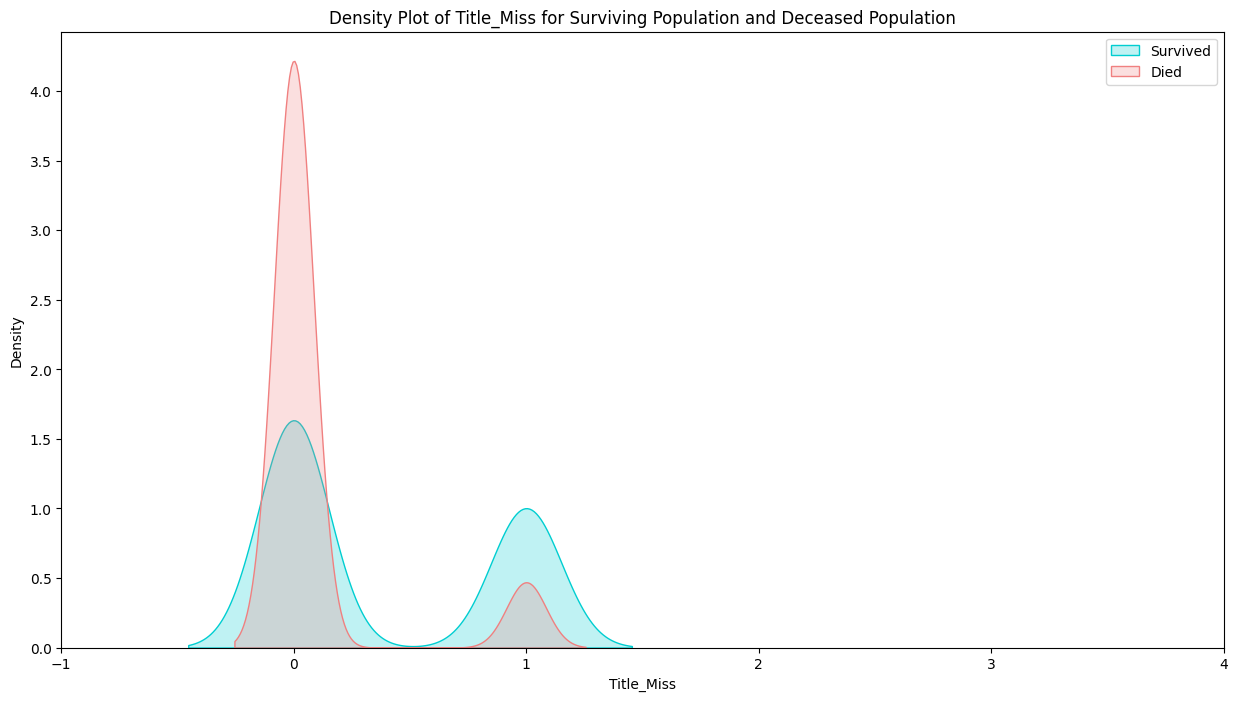

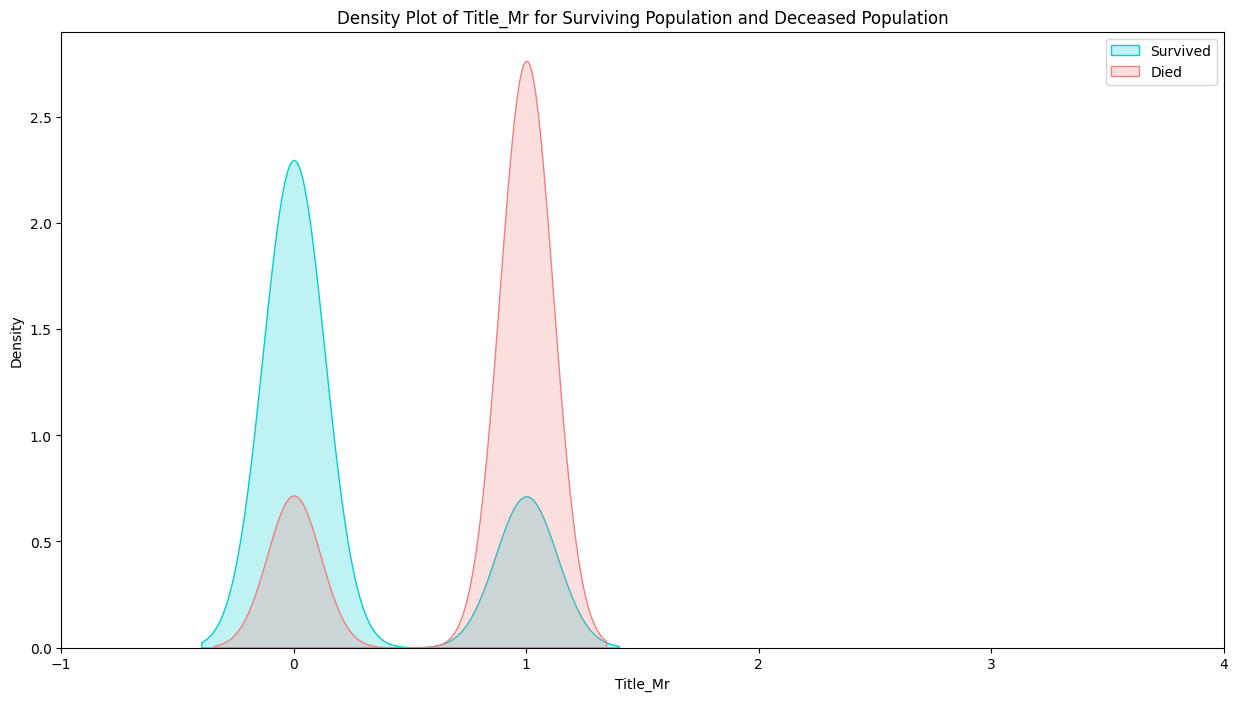

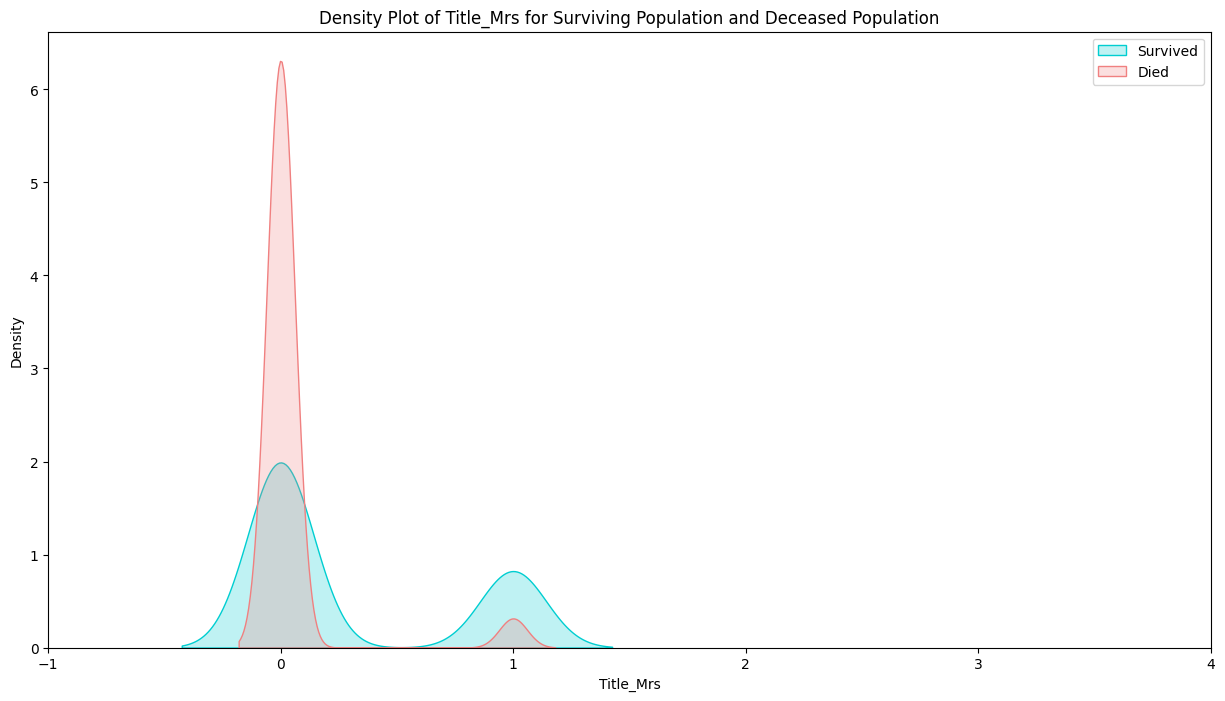

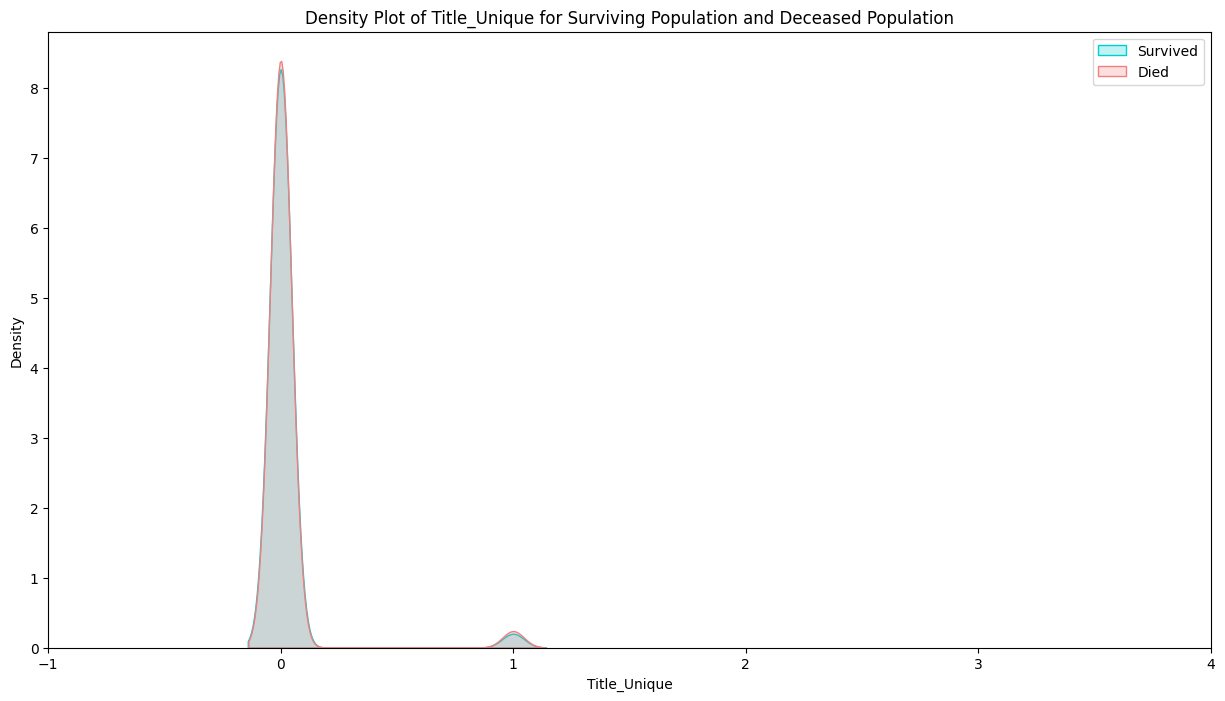

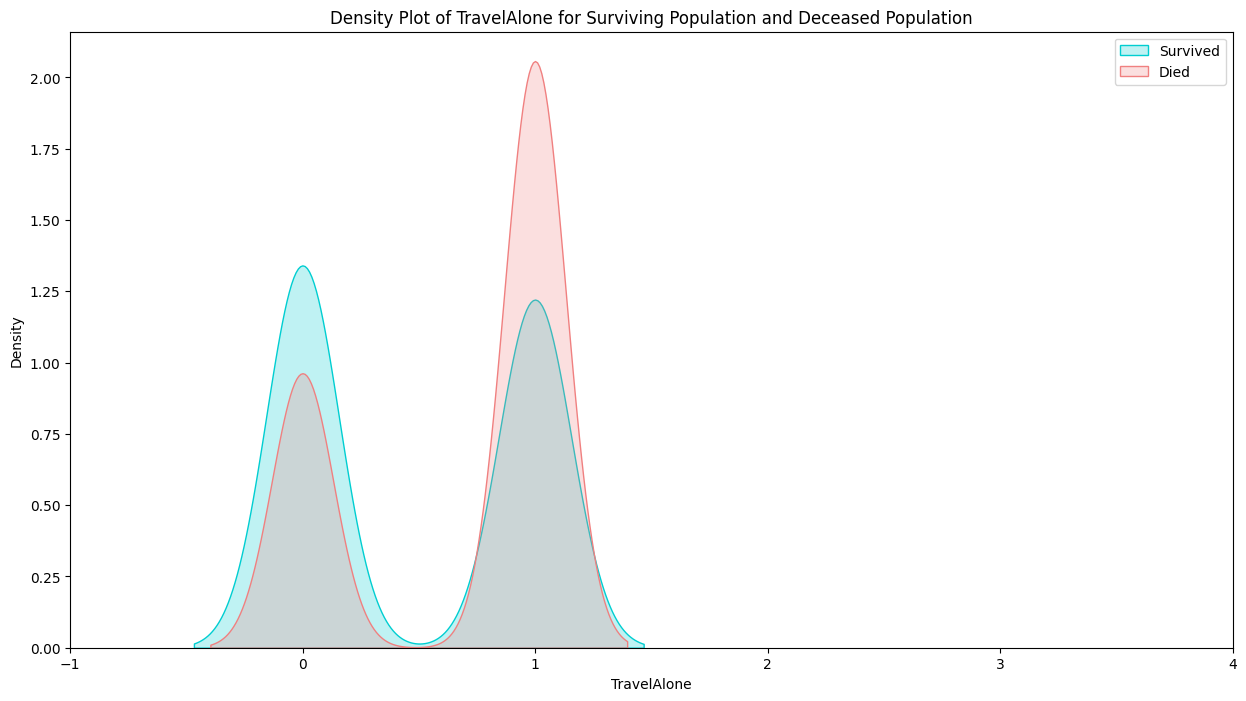

In [120]:
touple = ['Pclass', 'SibSp', 'Parch', 'HasCabin','CatAge', 'CatFare','Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Unique', 'TravelAlone']
for col in touple:
    plt.figure(figsize=(15,8))
    ax = sns.kdeplot(df_train[col][df_train.Survived == 1], color="darkturquoise", fill=True)
    sns.kdeplot(df_train[col][df_train.Survived == 0], color="lightcoral", fill=True)
    plt.legend(['Survived', 'Died'])
    plt.title(f'Density Plot of {col} for Surviving Population and Deceased Population')
    ax.set(xlabel=col)
    plt.xlim(-1,4)
    plt.show()

And so on ... I got the point.

**Task 4: Compute the Correlation Matrix**

Understanding the correlation between features can help in feature selection.

**Instructions:**

1. Compute the correlation matrix for df_train.
2. Visualize the correlation matrix using a heatmap.
3. Analyze the correlations and identify any strong relationships.

<details>
<summary>What is correlation?</summary>

Correlation is a way to measure how two things are related. If one thing changes, does the other thing change in a similar way?

- Positive correlation: When one goes up, the other goes up too (e.g., the more you study, the better your grades).
- Negative correlation: When one goes up, the other goes down (e.g., the more you exercise, the lower your weight might be).
- No correlation: No clear relationship between the two (e.g., shoe size and intelligence).

It tells us how strongly two things are connected!

(More about correlation: https://medium.com/@abdallahashraf90x/all-you-need-to-know-about-correlation-for-machine-learning-e249fec292e9)
</details>

Code:

```python
# Compute correlation matrix
correlation_matrix = df_train.corr()

#Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Training Dataset Features')
plt.show()
```

**Questions:**

1. Which features are most strongly correlated with 'Survived'?
2. Are there features that are highly correlated with each other?

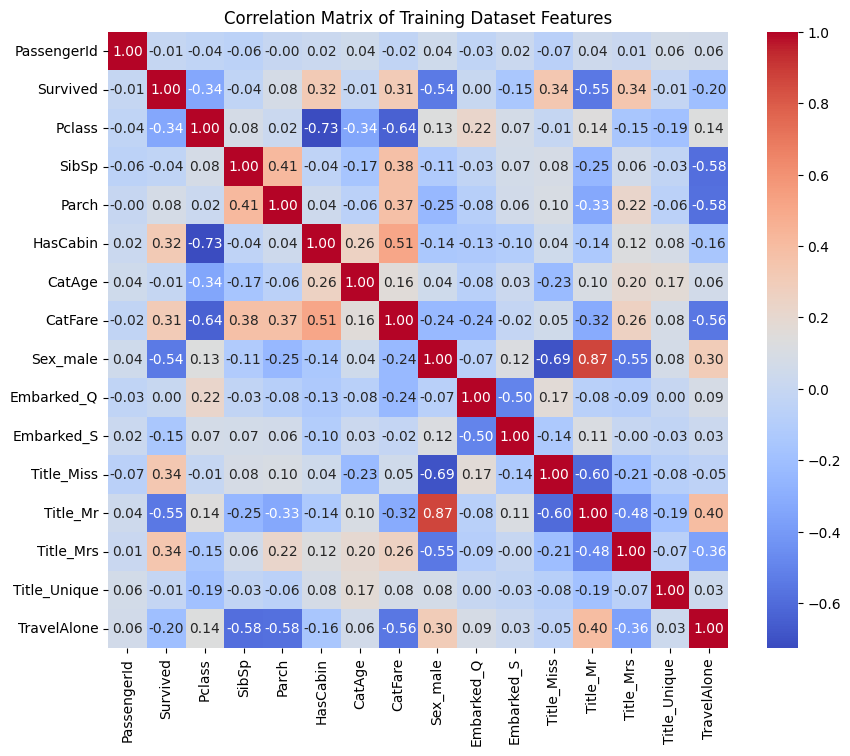

In [121]:
# Compute correlation matrix
correlation_matrix = df_train.corr()

#Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Training Dataset Features')
plt.show()

**Task 5: Perform Feature Selection with RFE**

Use Recursive Feature Elimination (RFE) to select the most important features.

https://medium.com/@rithpansanga/logistic-regression-for-feature-selection-selecting-the-right-features-for-your-model-410ca093c5e0

**Instructions:**

1. Prepare the data:
   - Drop irrelevant features (e.g., 'PassengerId', 'Survived', etc.).
2. Initialize the logistic regression model.
3. Perform RFE to select a subset of features.
4. List the selected features.

**Questions:**

1. Do the selected features make sense based on your earlier analysis?
2. Are there any features you expected to be important that were not selected?

In [122]:
# 1. Prepare the data
X = df_train.drop(['PassengerId', 'Survived'], axis=1)
Y = df_train['Survived']

# 2. Initialize the model
model = LogisticRegression(max_iter=1000)

# 3. Perform RFE
rfe = RFE(estimator=model, n_features_to_select=8)
rfe.fit(X, Y)

# 4. List the selected features
selected_features = X.columns[rfe.support_]
print('Selected features:', selected_features)

Selected features: Index(['Pclass', 'SibSp', 'HasCabin', 'Sex_male', 'Embarked_S', 'Title_Mr',
       'Title_Unique', 'TravelAlone'],
      dtype='object')


1. Seams about right.
2. Not really.

**Task 6: Build and Evaluate the Logistic Regression Model**

Now, use the selected features to build and evaluate a logistic regression model.

**Instructions:**

1. Split the data into training and testing sets.
2. Train the logistic regression model using the selected features.
3. Make predictions on the test set.
4. Evaluate the model using a confusion matrix and classification report.

Hint:
Look at the tutorial in the above task.

Confusion Matrix Table Layout:
[['TP' 'FN']
 ['FP' 'TN']]


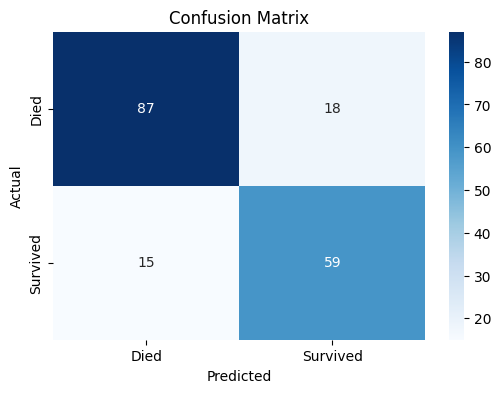

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       105
         1.0       0.77      0.80      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [123]:
confusion_matrix_table = np.array([
    ["TP", "FN"],
    ["FP", "TN"]
])
print("Confusion Matrix Table Layout:")
print(confusion_matrix_table)

# 1. Split the data
X = df_train[selected_features]
Y = df_train['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 2. Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

# 3. Make predictions
Y_pred = model.predict(X_test)

# 4. Evaluate the model
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

**Questions:**

1. How well does your model perform?
- Most values are in TP and TN, that also is reflected in the precision and recall.
2. Are there any improvements you can make? 
- Yes we can use a different model.
3. What happens if you remove features and predict again?
- The model may perform worse if important features are removed, leading to lower accuracy and recall. The feature tool picked the most important features. We could also use bootstrapping or k-fold cross validation to improve the model.

<img src='img/confusionmatrix.png'>

**Task 7: Understand Evaluation Metrics**

It's important to understand what the evaluation metrics mean.

**Instructions:**

1. Accuracy: Calculate the accuracy of your model.
2. Log Loss: Understand what log loss represents.
3. AUC: Compute the Area Under the ROC Curve (AUC).

Hint:

accuracy_score(y_test, y_pred)

log_loss(y_test, y_pred_probability)

roc_auc_score(y_test, y_pred_probablity)

**Questions:**

1. What do these metrics tell you about your model?
Accuracy tells us how often the model is correct. Log loss gives more weight to wrong predictions, especially when the model is very confident but wrong. AUC measures how well the model can distinguish between classes, with higher values indicating better performance.
2. Is there a trade-off between precision and recall?
Yes, there is often a trade-off between precision and recall. Increasing precision typically reduces recall and vice versa. This trade-off is important to consider when evaluating model performance, especially in imbalanced datasets.

**Task 8: Cross-Validation**

Perform cross-validation to assess the model's performance more robustly.

**Instructions:**

1. Use K-Fold Cross-Validation with ```cv=10```.
2. Evaluate using different scoring metrics: accuracy, log loss, and AUC.
3. Report the mean scores.

**Questions:**

1. Does cross-validation provide similar results to your initial evaluation?
2. Why is cross-validation important?

Accuracy: 0.82
Log Loss: 0.41
AUC: 0.89


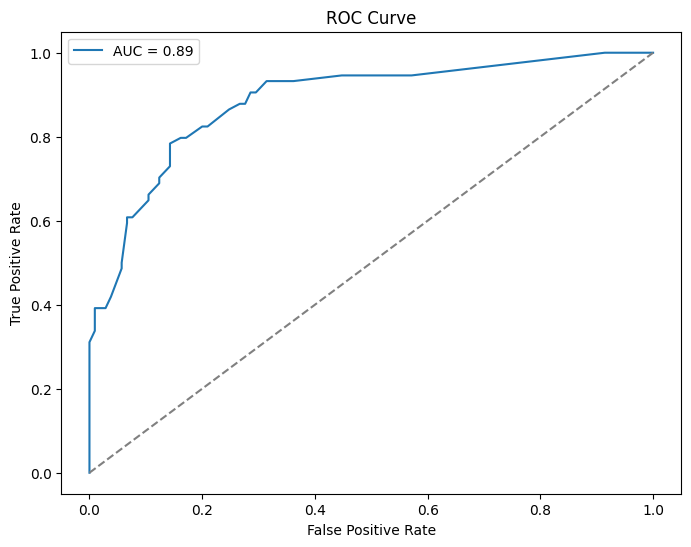

In [124]:
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, roc_curve

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Log Loss
Y_pred_proba = model.predict_proba(X_test)[:,1]
logloss = log_loss(Y_test, Y_pred_proba)
print(f'Log Loss: {logloss:.2f}')

# AUC
auc = roc_auc_score(Y_test, Y_pred_proba)
print(f'AUC: {auc:.2f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


For better understanding here in manual calculations.

Accuracy: 0.82
Log Loss: 0.41
AUC: 0.89


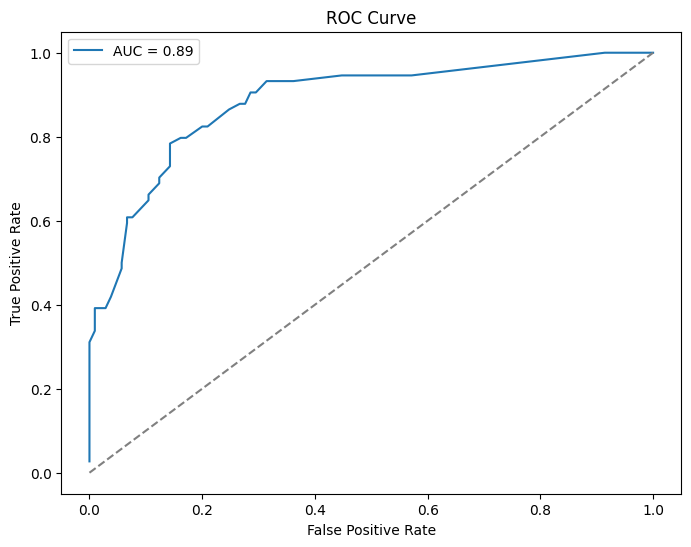

In [125]:
# Predicted labels and probabilities
Y_true = Y_test.to_numpy()
Y_pred = Y_pred
Y_pred_proba = model.predict_proba(X_test)[:, 1]

# 1. Accuracy
accuracy = np.mean(Y_true == Y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 2. Log Loss
epsilon = 1e-15  # to avoid log(0)
Y_pred_proba_clipped = np.clip(Y_pred_proba, epsilon, 1 - epsilon)
logloss = -np.mean(Y_true * np.log(Y_pred_proba_clipped) + (1 - Y_true) * np.log(1 - Y_pred_proba_clipped))
print(f'Log Loss: {logloss:.2f}')

# 3. AUC (area under ROC curve)
# Sort by predicted probability
order = np.argsort(Y_pred_proba)
Y_true_sorted = Y_true[order]
Y_pred_sorted = Y_pred_proba[order]

# Compute TPR and FPR manually
P = np.sum(Y_true_sorted)
N = len(Y_true_sorted) - P
tpr_list = []
fpr_list = []

for thresh in np.unique(Y_pred_sorted):
    y_hat = (Y_pred_sorted >= thresh).astype(int)
    TP = np.sum((y_hat == 1) & (Y_true_sorted == 1))
    FP = np.sum((y_hat == 1) & (Y_true_sorted == 0))
    TPR = TP / P
    FPR = FP / N
    tpr_list.append(TPR)
    fpr_list.append(FPR)

# Sort points and compute AUC via trapezoidal rule
fpr_arr = np.array(fpr_list)
tpr_arr = np.array(tpr_list)
auc = -(np.trapezoid(tpr_arr, fpr_arr))
print(f'AUC: {auc:.2f}')

# 4. Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_arr, tpr_arr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], '--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Accuracy, log_loss and AUC
* **Accuracy**: is a metric used to evaluate the performance of a classification model. It measures the percentage of correctly predicted instances out of the total instances.

* **Log Loss**: also known as logarithmic loss or cross-entropy loss, is a metric used to evaluate the performance of a classification model that outputs probabilities. It measures the difference between the predicted probabilities and the true labels.

* **AUC (Area Under the Curve)**: is a metric used to evaluate the performance of a binary classification model. It represents the area under the Receiver Operating Characteristic (ROC) curve, which plots the true positive rate against the false positive rate at various classification thresholds. AUC provides an aggregate measure of the model's ability to discriminate between positive and negative instances.

**Task 8: Cross-Validation**

Perform cross-validation to assess the model's performance more robustly.

**Instructions:**

1. Use K-Fold Cross-Validation with ```cv=10```.
2. Evaluate using different scoring metrics: accuracy, log loss, and AUC.
3. Report the mean scores.



In [126]:
from sklearn.model_selection import cross_val_score

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Accuracy
scores_accuracy = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print(f'Average Accuracy: {scores_accuracy.mean():.2f}')

# Log Loss
scores_log_loss = cross_val_score(model, X, Y, cv=10, scoring='neg_log_loss')
print(f'Average Log Loss: {-scores_log_loss.mean():.2f}')

# AUC
scores_auc = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(f'Average AUC: {scores_auc.mean():.2f}')


Average Accuracy: 0.81
Average Log Loss: 0.43
Average AUC: 0.87


**Questions:**

1. Does cross-validation provide similar results to your initial evaluation?
- Cross-validation gave less accurate results. This is because the model is tested on different subsets of the data, which can reveal variations in performance that may not be apparent in a single train-test split. It helps to ensure that the model's performance is consistent and not overly dependent on a specific subset of data.
2. Why is cross-validation important?
- Cross-validation is important because it provides a more reliable estimate of a model's performance by testing it on multiple subsets of the data. This helps to identify any issues with overfitting or underfitting and ensures that the model generalizes well to unseen data.